# EJERCICIOS SPARK, Ejercicio 3 - Julia Hernández Elena

In [1]:
import os
import pandas as pd

from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import Row
import pyspark.sql.functions as F


In [2]:
conf = (

    SparkConf()
    .setAppName(u"[ICAI] Ejercicios Spark")
    .set("spark.executor.memory", "7g")
    .set("spark.executor.cores", "5")
    .set("spark.default.parallelism", 600)
    .set("spark.sql.shuffle.partitions", 600) 
    .set("spark.dynamicAllocation.maxExecutors", 2) 
)

In [3]:
spark = (

    SparkSession.builder
    .config(conf=conf)
    .enableHiveSupport()
    .getOrCreate()

)

# EJERCICIO 3

### Replicar el ejercicio de los datos de la bolsa usando la API de DataFrame

### 1. Leer todos los ficheros en un único DataFrame:

In [4]:
bolsa = (

    spark.read
    .options(header=True, InferSchema=True)
    .csv('/datos/files_bolsa') 
    #Simplemente poniendo la carpera te leee todos los csvs en esa ruta

).cache()

In [5]:
bolsa.show(3)

+-------+-------+-------+----------+--------+----------+-------------------+
|   Open|   High|    Low|     Close|  Volume|  Adjusted|               date|
+-------+-------+-------+----------+--------+----------+-------------------+
| 254.52|258.569|253.003|256.201202|11007100|256.201202|2007-07-27 00:00:00|
|322.818|330.791|316.351|330.605591|16873900|330.605591|2007-11-13 00:00:00|
|314.444|318.569|314.424|316.801788| 3727400|316.801788|2012-07-31 00:00:00|
+-------+-------+-------+----------+--------+----------+-------------------+
only showing top 3 rows



### 2. Crear un nuevo campo year con el año del campo date. (Podemos usar F.year() )

In [6]:
bolsa = bolsa.withColumn('year', F.year('date'))

In [7]:
bolsa.show(3)

+-------+-------+-------+----------+--------+----------+-------------------+----+
|   Open|   High|    Low|     Close|  Volume|  Adjusted|               date|year|
+-------+-------+-------+----------+--------+----------+-------------------+----+
| 254.52|258.569|253.003|256.201202|11007100|256.201202|2007-07-27 00:00:00|2007|
|322.818|330.791|316.351|330.605591|16873900|330.605591|2007-11-13 00:00:00|2007|
|314.444|318.569|314.424|316.801788| 3727400|316.801788|2012-07-31 00:00:00|2012|
+-------+-------+-------+----------+--------+----------+-------------------+----+
only showing top 3 rows



### 3. Para cada año cuantas filas hay:

In [8]:
bolsa.groupBy('year').count().toPandas()

,year,count
0,2006,251
1,2014,252
2,2012,250
3,2017,198
4,2013,252
5,2009,252
6,2011,252
7,2007,251
8,2015,252
9,2016,252


### 4. Crear un nuevo campo de tipo año-mes:

In [9]:
bolsa = bolsa.withColumn('year_month', F.concat_ws("-", F.year('date'), F.month('date')))

In [10]:
bolsa.show(3)

+-------+-------+-------+----------+--------+----------+-------------------+----+----------+
|   Open|   High|    Low|     Close|  Volume|  Adjusted|               date|year|year_month|
+-------+-------+-------+----------+--------+----------+-------------------+----+----------+
| 254.52|258.569|253.003|256.201202|11007100|256.201202|2007-07-27 00:00:00|2007|    2007-7|
|322.818|330.791|316.351|330.605591|16873900|330.605591|2007-11-13 00:00:00|2007|   2007-11|
|314.444|318.569|314.424|316.801788| 3727400|316.801788|2012-07-31 00:00:00|2012|    2012-7|
+-------+-------+-------+----------+--------+----------+-------------------+----+----------+
only showing top 3 rows



### 5. Agrupar por el nuevo campo year_month y obtener el máximo del campo Close para cada año-mes:

In [11]:
cierre = (

    bolsa
    .groupBy('year_month')
    .agg(F.max('Close').alias('cierre'))
    .orderBy('year_month')

)

In [12]:
cierre.show(10)

+----------+----------+
|year_month|    cierre|
+----------+----------+
|    2005-1|102.052055|
|   2005-10|186.256256|
|   2005-11|214.524521|
|   2005-12|216.236237|
|    2005-2|105.535538|
|    2005-3| 94.499496|
|    2005-4|111.876877|
|    2005-5|138.773773|
|    2005-6|152.202209|
|    2005-7|157.127121|
+----------+----------+
only showing top 10 rows



### 6. Convertirlo en un DataFrame de pandas y dibujar la serie con matplotlib:

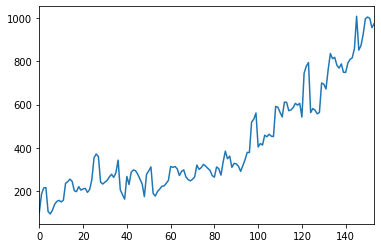

In [13]:
cierre_df = cierre.toPandas() #lo convertimos en un pandadf

%matplotlib inline
cierre_df.cierre.plot() #lo pintamos (cierre es el la variable que queremos pintar)

In [14]:
spark.stop()